In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import sklearn
from scipy.stats.stats import pearsonr
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import pdist, squareform
from IPython.display import display, HTML
import matplotlib.patches as mpatches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline

In [11]:
songs = pd.read_csv("/Users/piyushkhemka/Downloads/test.csv")

In [12]:
genres = songs['artist_mbtags']
genres

0                                                      []
1                                ["classic pop and rock"]
2                                                      []
3                            ["uk", "british", "english"]
4                                                      []
5                                                      []
6                                                      []
7                                                      []
8                                                      []
9                                                      []
10                                                     []
11                                                     []
12                                                     []
13                                                     []
14                                    ["soul and reggae"]
15           ["canadian", "country rock", "rock", "folk"]
16                                                     []
17            

In [28]:
import re
count = 0
keydict = {}
for eachlist in genres:
    for eachelement in eachlist.split(","):
        alpha = re.sub(r'\W+', '', eachelement)
        try:
            keydict[alpha] += 1 
        except KeyError:
            keydict[alpha] = 0
            keydict[alpha] += 1 
        

In [29]:
keydict

{'': 1222,
 '00s': 4,
 '10s': 3,
 '2005': 2,
 '70s': 5,
 '80s': 13,
 '90s': 7,
 'acappella': 2,
 'adultcontemporary': 3,
 'alternative': 19,
 'alternativecountry': 2,
 'alternativedance': 3,
 'alternativehiphop': 2,
 'alternativemetal': 17,
 'alternativerock': 50,
 'altpunk': 2,
 'ambient': 4,
 'ambienttechno': 2,
 'american': 158,
 'americanidol': 2,
 'americanthrashmetal': 3,
 'americanunderground': 2,
 'amu00e9ricain': 33,
 'angry': 2,
 'angsty': 1,
 'arranger': 2,
 'artrock': 7,
 'asian': 4,
 'athens': 1,
 'atlantic': 1,
 'australia': 4,
 'australian': 5,
 'austrian': 2,
 'austropop': 2,
 'avantegarde': 3,
 'barbade': 1,
 'barbadian': 1,
 'barbadien': 1,
 'barbados': 1,
 'baroquepop': 1,
 'belgium': 3,
 'bhangra': 2,
 'bigband': 4,
 'bigbeat': 2,
 'blackeneddeathmetal': 2,
 'blackmetal': 12,
 'bluegrass': 2,
 'blues': 22,
 'bluesrock': 16,
 'bossanova': 4,
 'boston': 4,
 'boyband': 2,
 'boygroup': 2,
 'braintree': 2,
 'brazil': 2,
 'brazilian': 10,
 'brazilianclassicsplayer': 2,
 '

In [30]:
import operator
sorted_x = sorted(keydict.items(), key=operator.itemgetter(1), reverse = True)

In [31]:
sorted_x

[('', 1222),
 ('american', 158),
 ('rock', 141),
 ('classicpopandrock', 125),
 ('rockandindie', 112),
 ('british', 98),
 ('uk', 89),
 ('usa', 76),
 ('english', 68),
 ('metal', 61),
 ('folk', 60),
 ('punk', 57),
 ('pop', 52),
 ('alternativerock', 50),
 ('popandchart', 47),
 ('hiphop', 42),
 ('hiphoprnbanddancehall', 37),
 ('electronic', 33),
 ('amu00e9ricain', 33),
 ('hardrock', 32),
 ('unitedstates', 27),
 ('productionmusic', 25),
 ('blues', 22),
 ('punkrock', 22),
 ('heavymetal', 22),
 ('french', 20),
 ('country', 20),
 ('alternative', 19),
 ('finnish', 18),
 ('britannique', 18),
 ('soundtrack', 17),
 ('soulandreggae', 17),
 ('alternativemetal', 17),
 ('hardcorepunk', 16),
 ('jazzandblues', 16),
 ('bluesrock', 16),
 ('rnb', 16),
 ('danceandelectronica', 14),
 ('composer', 14),
 ('rap', 14),
 ('indierock', 14),
 ('newwave', 13),
 ('england', 13),
 ('thrashmetal', 13),
 ('80s', 13),
 ('classical', 13),
 ('easylisteningsoundtracksandmusicals', 13),
 ('indie', 12),
 ('blackmetal', 12),
 (

In [23]:
newdf = pd.DataFrame(data = sorted_x)

In [32]:
newdict = ["american","rock","classicpopandrock","british","rockandindie","british","uk","usa","english","metal","other"]

In [47]:
final = {}
for key,value in sorted_x:
    if key in newdict:
        final[key] = value
    else:
        try:
            final["other"] +=value
        except KeyError:
            final["other"] = 0

In [49]:
finallist = []
final

{'american': 158,
 'british': 98,
 'classicpopandrock': 125,
 'english': 68,
 'metal': 61,
 'other': 2035,
 'rock': 141,
 'rockandindie': 112,
 'uk': 89,
 'usa': 76}

In [52]:
finaldf = pd.DataFrame(data = final.items())

In [54]:
finaldf = finaldf.rename(index=str, columns={0: "genre", 1: "count"})

In [70]:
finaldf["genreindex"] = finaldf["genre"]
finaldf.set_index("genreindex")

,genre,count
genreindex,,
usa,usa,76
english,english,68
metal,metal,61
classicpopandrock,classicpopandrock,125
british,british,98
american,american,158
other,other,2035
uk,uk,89
rock,rock,141


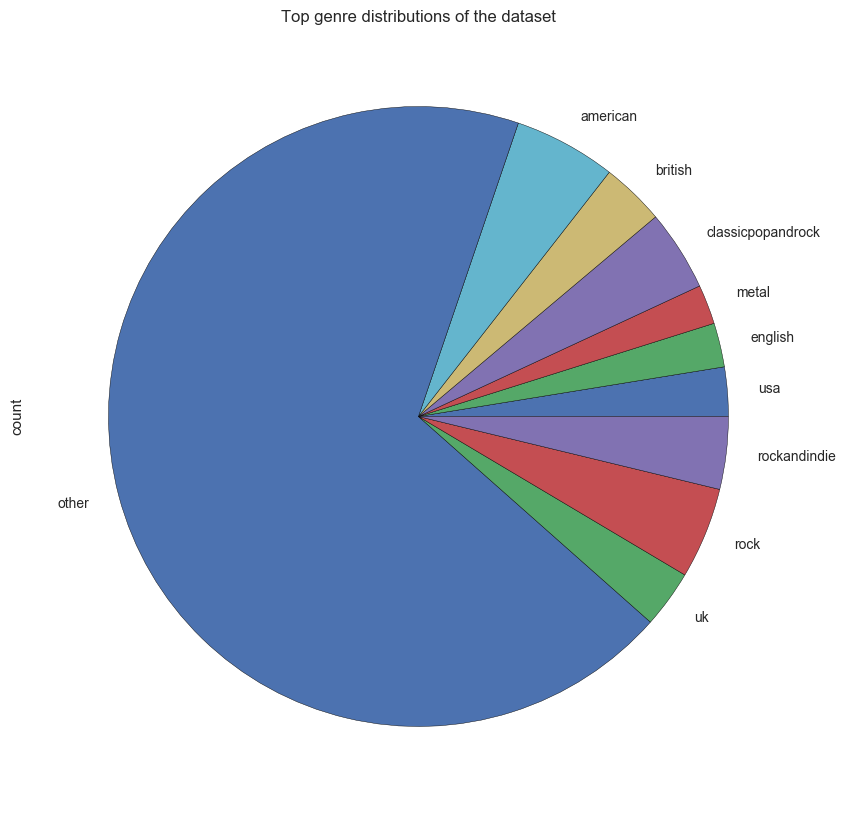

In [89]:
finaldf.plot(kind="pie",x="genre",y="count",legend =False,labels = finaldf["genre"],figsize=(10, 10))
plt.title("Top genre distributions of the dataset")
plt.savefig("piechart.png")